## Analisis de datos clima, invernadero

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split #divide dataset training y test

### Carga de datos ambientales desde dataset de invernadero
El conjunto total de datos recibe tratamiento para análisis.  La información faltante o con valor de NaN es sustituida por la media del conjunto de valores de cada variable.

In [2]:
def limpieza(archivo):
    var_inv = pd.read_csv(archivo,low_memory=False)
    var_col = var_inv.columns.str.lower() #convierte a minusculas
    #Revisión de registros de las variables para remplazar NaN con el valor medio de la secuencia.
    imp = SimpleImputer(missing_values=np.nan, strategy="median") #'most_frequent', 'median', 'mean', 'constant'
    var_arr=imp.fit_transform(var_inv) #Convierte dataframe en arreglo
    if(var_arr.shape != var_inv.shape): print ("Se ha eliminado una columna llena con valores NaN") #Advertencia supresión de variable vacía
    return (var_arr, var_col)
# Se dispone la totalidad de variables con muestreo de 5 minutos.
[var_ar1, var_col1]=limpieza('GreenhouseClimate1.csv')
[var_ar2, var_col2]=limpieza('GrodanSens1.csv')
[var_ar3, var_col3]=limpieza('Weather.csv')

Se define el espacio temporal para el análisis, considerando los intervalos de muestreo de las variables.  Es posible definir un desplazamiento en unidades de día para el inicio del análisis, así como la cantidad de días para el análisis.

In [3]:
[nreg1, tam1]=np.shape(var_ar1)
[nreg2, tam2]=np.shape(var_ar2)
[nreg3, tam3]=np.shape(var_ar3)

dia=30 #Día inicial para análisis
num_dias=2 #numero de dias analisis
inter=5 #intervalo en minutos
m_dia=int(1*24*60/inter) #Número de muestras diarias
m_num_dias=m_dia*num_dias #total de muestras para análisis
offset=int((dia-1)*m_dia) #Posición de la muestra inicial en el conjunto

reg_ini=offset
reg_fin=offset+m_num_dias
#reg_ini=100
#reg_fin=nreg1-100

var_arr1=var_ar1[reg_ini:reg_fin,:]
var_arr2=var_ar2[reg_ini:reg_fin,:]
var_arr3=var_ar3[reg_ini:reg_fin,:]
var_arrt=np.hstack((var_ar1[reg_ini:reg_fin,0:tam1], var_ar2[reg_ini:reg_fin,1:tam2], var_ar3[reg_ini:reg_fin,1:tam3]))
var_colt=np.hstack((var_col1, var_col2[1:tam2], var_col3[1:tam3]))

## Selección de datos para análisis
Puede elegirse el dataset individual o integrado, elegiendo entre las alternativas var_arr y luego del despliegue se selecciona la variable objeto para su análisis.  En cuanto al análisis de correlación puede definirse el conjunto completo o lista de variables para establecer el análisis.

In [4]:
var_inv=pd.DataFrame(var_arrt, columns = var_colt)
var_inv.columns

Index(['%time', 'assimlight', 'blackscr', 'co2air', 'cum_irr', 'ec_drain_pc',
       'enscr', 'humdef', 'pipegrow', 'pipelow', 'rhair', 'tair', 'tot_par',
       'tot_par_lamps', 'ventlee', 'ventwind', 'assim_sp', 'assim_vip',
       'co2_dos', 'co2_sp', 'co2_vip', 'dx_sp', 'dx_vip', 'int_blue_sp',
       'int_blue_vip', 'int_farred_sp', 'int_farred_vip', 'int_red_sp',
       'int_red_vip', 'int_white_sp', 'int_white_vip', 'ph_drain_pc',
       'scr_blck_sp', 'scr_blck_vip', 'scr_enrg_sp', 'scr_enrg_vip',
       't_grow_min_vip', 't_heat_sp', 't_heat_vip', 't_rail_min_sp',
       't_rail_min_vip', 't_vent_sp', 't_ventlee_vip', 't_ventwind_vip',
       'water_sup', 'water_sup_intervals_sp_min',
       'water_sup_intervals_vip_min', 'window_pos_lee_sp',
       'window_pos_lee_vip', 'ec_slab1', 'ec_slab2', 'wc_slab1', 'wc_slab2',
       't_slab1', 't_slab2', 'abshumout', 'iglob', 'parout', 'pyrgeo',
       'radsum', 'rain', 'rhout', 'tout', 'winddir', 'windsp'],
      dtype='object')

In [5]:
#Temperatura
v_invd=(var_inv.loc[:,["tair","t_heat_sp","t_heat_vip","t_slab1","tout"]]) #Ingresar el listado de variables para análisis de correlación.

#Irrigación
#v_invd=(var_inv.loc[:,["cum_irr","water_sup","water_sup_intervals_sp_min","water_sup_intervals_vip_min","wc_slab1","wc_slab2"]]) #Ingresar el listado de variables para análisis de correlación.
#v_invd=var_inv #Realiza análisis de correlación del conjunto

## Análisis individual de cada variable

In [6]:
#CO2:
#var_texty='CO2 en invernadero, ppm'
#var_textx='Tiempo en intervalos de 5 min.'
#var_test=var_inv.co2air

#Irrigación:
#var_texty='Irrigación acumulada, L/m² day'
#var_textx='Tiempo en intervalos de 5 min.'
#var_test=var_inv.cum_irr

#Temperatura
var_texty='Temperatura aire en invernadero, °C'
var_textx='Tiempo en intervalos de 5 min.'
var_test=var_inv.co2_sp
text1="$Realized SP$"
#var_text='cum_irr, L/m² day'
#var_test.unique() # Identificación de conjunto de valores usados
#var_test.value_counts() #Determina categorías y sus elementos
#Si la data tiene imbalance, que podría ocasionar problema en el modelo: cesgo
#var_test.value_counts().keys()


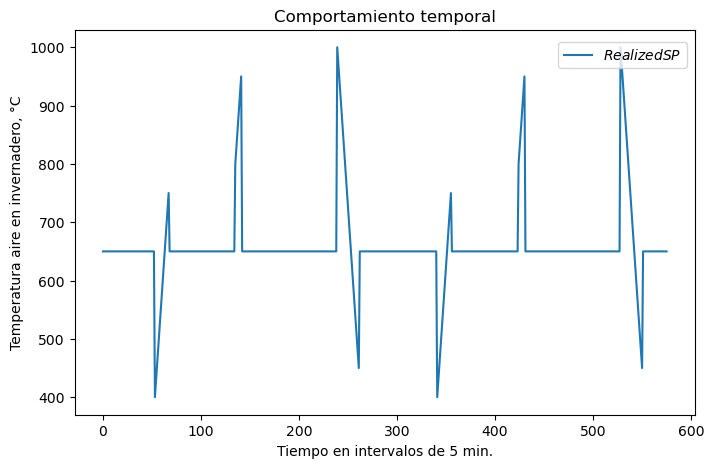

In [7]:
plt.figure(figsize=(8,5))
plt.plot(var_test,label=text1)
plt.title('Comportamiento temporal')
plt.xlabel(var_textx)
plt.ylabel(var_texty)
plt.legend(loc=(0.78, 0.9))
plt.show()

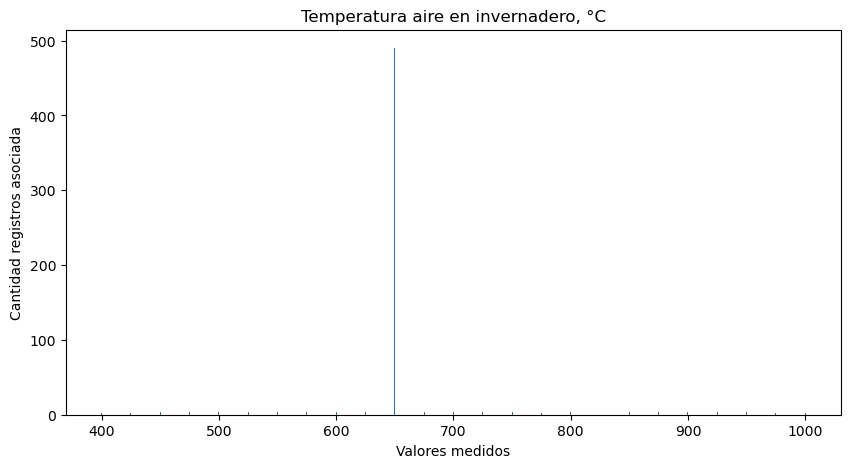

In [8]:
plt.figure(figsize=(10,5))
plt.bar(var_test.value_counts().keys(),var_test.value_counts(), width=0.8)
plt.title(var_texty)
plt.xlabel('Valores medidos')
plt.ylabel('Cantidad registros asociada')
plt.show()

In [9]:
var_test.describe()

count     576.000000
mean      657.552083
std        69.199126
min       400.000000
25%       650.000000
50%       650.000000
75%       650.000000
max      1000.000000
Name: co2_sp, dtype: float64

## Correlación y dependencia entre variables

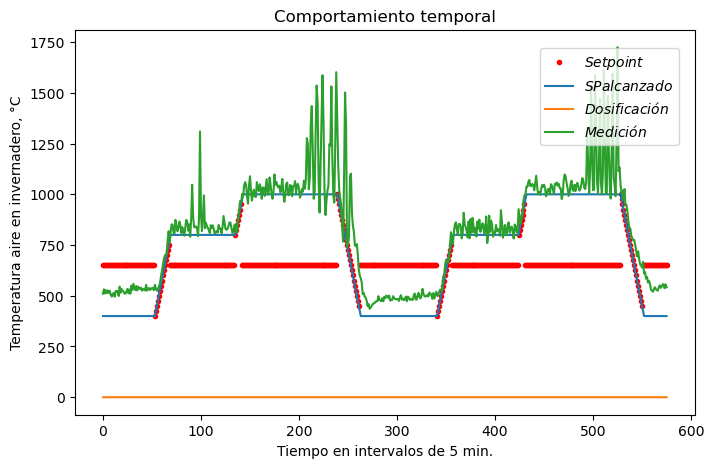

In [10]:
#CO2:
#var_texty='CO2 en invernadero, ppm'
#var_textx='Tiempo en intervalos de 5 min.'
#var_test=var_inv.co2air

#Irrigación:
#var_texty='Irrigación acumulada, L/m² day'
#var_textx='Tiempo en intervalos de 5 min.'
#var_test=var_inv.cum_irr

#Temperatura
var_texty='Temperatura aire en invernadero, °C'
var_textx='Tiempo en intervalos de 5 min.'
var_test=var_inv.co2_sp
text1="$Set point$"
var_test2=var_inv.co2_vip
text2="$SP alcanzado$"
var_test3=var_inv.co2_dos
text3="$Dosificación$"
var_test4=var_inv.co2air
text4="$Medición$"
#var_text='cum_irr, L/m² day'
#var_test.unique() # Identificación de conjunto de valores usados
#var_test.value_counts() #Determina categorías y sus elementos
#Si la data tiene imbalance, que podría ocasionar problema en el modelo: cesgo
#var_test.value_counts().keys()

plt.figure(figsize=(8,5))
plt.plot(var_test,'r.', label=text1)#, label=text1)
plt.plot(var_test2, label=text2)
plt.plot(var_test3, label=text3)
plt.plot(var_test4, label=text4)
plt.title('Comportamiento temporal')
plt.xlabel(var_textx)
plt.ylabel(var_texty)
plt.legend(loc=(0.75, 0.7))
plt.show()

In [11]:
tam=np.size(v_invd.columns)*1

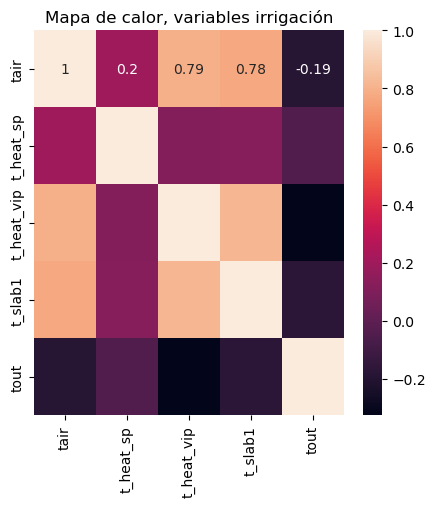

In [12]:
plt.figure(figsize=(tam,tam))
plt.title("Mapa de calor, variables irrigación")
sns.heatmap(v_invd.corr(),annot=True)
plt.show()

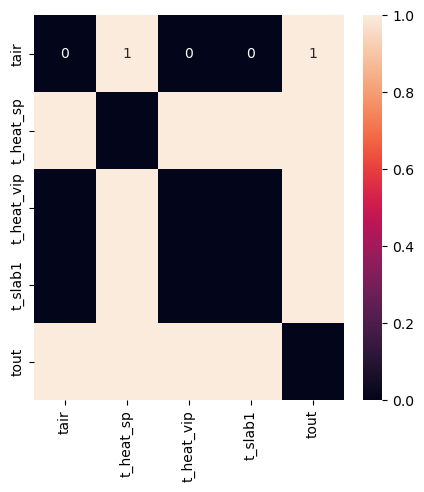

In [13]:
plt.figure(figsize=(tam,tam))
sns.heatmap(v_invd.corr()<0.2,annot=True)
plt.show()

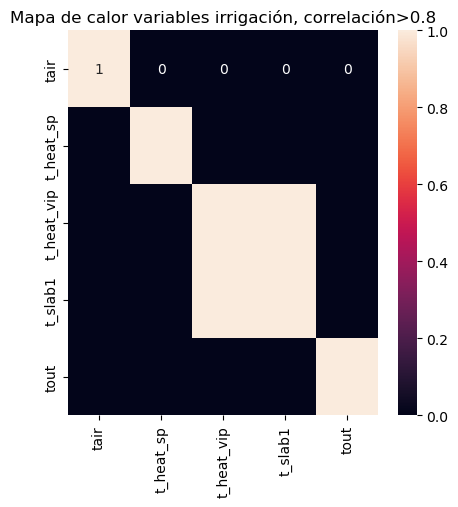

In [14]:
plt.figure(figsize=(tam,tam))
plt.title("Mapa de calor variables irrigación, correlación>0.8")
sns.heatmap(v_invd.corr()>0.8,annot=True)
plt.show()

In [15]:
v_invd.to_csv("datcorr.csv") 